# Part 1
* Ruben Nhez* 
Student Number:33704576
* 
I worked and submitted alone

# Introduction:
* This task is based on the Sonar real data seen previously in class. Several objects which can be rock or metal cylinders are scanned on different angles and under different conditions, with sonar signals. 60 measurements are recorded per columns for each object (one record per object) and these are the predictors called A1, A2, …, A60. The label associated with each record contains the letter "R" if the object is a rock and "M" if it is metal cylinder, and this is the outcome variable called Class.

Two datasets are provided to you: a training dataset in the sonar_train.csv file, and a test dataset in the sonar_test.csv file.

a) You are required to write a Python code implementing the simple Nearest Neighbour algorithm, with the Minkowski distance, both discussed in lecture of week 1. You should not implement k-Nearest Neighbour, for an arbitrary number of neighbours k. Your code will read the power q appearing in the Mionkowski distance, and will classify each record from the test dataset based on the training dataset. Remember, to classify a record from the test set you need to find its nearest neighbour in the training set (this is the one which minimizes the distance to the test set record); take the class of the nearest neighbour as the predicted class for the test set record. After classifying all the records in the test set, your code needs to calculate and display the accuracy, recall, precision, and F1 measure with respect to the class "M" (which is assumed to be the positive class), of the predictions on the test dataset. Run your code to produce results for Manhattan and for Euclidian distances, which are particular cases of Minkowski's distance.

# Setup

In [195]:
# show plots inside the notebook  
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Data loading and Looking at the data

In [196]:
train_data = pd.read_csv('sonar_train.csv',header='infer')
train_data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A52,A53,A54,A55,A56,A57,A58,A59,A60,Class
0,0.0079,0.0086,0.0055,0.0250,0.0344,0.0546,0.0528,0.0958,0.1009,0.1240,...,0.0176,0.0127,0.0088,0.0098,0.0019,0.0059,0.0058,0.0059,0.0032,R
1,0.0599,0.0474,0.0498,0.0387,0.1026,0.0773,0.0853,0.0447,0.1094,0.0351,...,0.0013,0.0005,0.0227,0.0209,0.0081,0.0117,0.0114,0.0112,0.0100,M
2,0.0093,0.0269,0.0217,0.0339,0.0305,0.1172,0.1450,0.0638,0.0740,0.1360,...,0.0212,0.0091,0.0056,0.0086,0.0092,0.0070,0.0116,0.0060,0.0110,R
3,0.0151,0.0320,0.0599,0.1050,0.1163,0.1734,0.1679,0.1119,0.0889,0.1205,...,0.0061,0.0015,0.0084,0.0128,0.0054,0.0011,0.0019,0.0023,0.0062,R
4,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,0.0731,0.1249,0.1665,0.1496,0.1443,0.2770,0.2555,0.1712,0.0466,0.1114,...,0.0444,0.0230,0.0290,0.0141,0.0161,0.0177,0.0194,0.0207,0.0057,M
135,0.0516,0.0944,0.0622,0.0415,0.0995,0.2431,0.1777,0.2018,0.2611,0.1294,...,0.0432,0.0274,0.0152,0.0120,0.0129,0.0020,0.0109,0.0074,0.0078,M
136,0.0015,0.0186,0.0289,0.0195,0.0515,0.0817,0.1005,0.0124,0.1168,0.1476,...,0.0108,0.0075,0.0089,0.0036,0.0029,0.0013,0.0010,0.0032,0.0047,M
137,0.0411,0.0277,0.0604,0.0525,0.0489,0.0385,0.0611,0.1117,0.1237,0.2300,...,0.0217,0.0038,0.0019,0.0065,0.0132,0.0108,0.0050,0.0085,0.0044,M


In [197]:
train_data.iterrows()

<generator object DataFrame.iterrows at 0x0000022E40CF1070>

In [198]:
test_data = pd.read_csv('sonar_test.csv',header='infer')

 
test_data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A52,A53,A54,A55,A56,A57,A58,A59,A60,Class
0,0.0125,0.0152,0.0218,0.0175,0.0362,0.0696,0.0873,0.0616,0.1252,0.1302,...,0.0041,0.0074,0.0030,0.0050,0.0048,0.0017,0.0041,0.0086,0.0058,R
1,0.0530,0.0885,0.1997,0.2604,0.3225,0.2247,0.0617,0.2287,0.0950,0.0740,...,0.0244,0.0199,0.0257,0.0082,0.0151,0.0171,0.0146,0.0134,0.0056,M
2,0.0368,0.0279,0.0103,0.0566,0.0759,0.0679,0.0970,0.1473,0.2164,0.2544,...,0.0105,0.0024,0.0018,0.0057,0.0092,0.0009,0.0086,0.0110,0.0052,M
3,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040,R
4,0.0216,0.0124,0.0174,0.0152,0.0608,0.1026,0.1139,0.0877,0.1160,0.0866,...,0.0052,0.0049,0.0096,0.0134,0.0122,0.0047,0.0018,0.0006,0.0023,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,0.0203,0.0121,0.0380,0.0128,0.0537,0.0874,0.1021,0.0852,0.1136,0.1747,...,0.0134,0.0094,0.0047,0.0045,0.0042,0.0028,0.0036,0.0013,0.0016,M
65,0.0117,0.0069,0.0279,0.0583,0.0915,0.1267,0.1577,0.1927,0.2361,0.2169,...,0.0053,0.0029,0.0020,0.0013,0.0029,0.0020,0.0062,0.0026,0.0052,M
66,0.0308,0.0339,0.0202,0.0889,0.1570,0.1750,0.0920,0.1353,0.1593,0.2795,...,0.0167,0.0127,0.0138,0.0090,0.0051,0.0029,0.0122,0.0056,0.0020,R
67,0.0526,0.0563,0.1219,0.1206,0.0246,0.1022,0.0539,0.0439,0.2291,0.1632,...,0.0339,0.0149,0.0335,0.0376,0.0174,0.0132,0.0103,0.0364,0.0208,M


In [199]:
train_data.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A51,A52,A53,A54,A55,A56,A57,A58,A59,A60
count,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,...,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,0.028881,0.037319,0.041682,0.052694,0.075263,0.105000,0.123863,0.132810,0.175160,0.205400,...,0.016472,0.013347,0.010170,0.010484,0.009495,0.008061,0.007673,0.008077,0.007858,0.006549
std,0.022602,0.033011,0.038513,0.047588,0.056174,0.057755,0.061604,0.087889,0.120416,0.126882,...,0.012275,0.010252,0.007068,0.006864,0.007135,0.006076,0.005402,0.006803,0.006001,0.004598
min,0.001500,0.001700,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.019300,...,0.001500,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000600,0.000100,0.000600
25%,0.013150,0.015800,0.017050,0.024400,0.039200,0.071950,0.086800,0.082650,0.094000,0.110300,...,0.008700,0.006800,0.004650,0.005350,0.004100,0.003950,0.003700,0.003550,0.003550,0.003100
50%,0.022100,0.029700,0.032400,0.041500,0.061700,0.092900,0.105300,0.111700,0.152200,0.183800,...,0.014000,0.011300,0.008400,0.008900,0.007900,0.006400,0.006200,0.005800,0.006500,0.005400
75%,0.035250,0.047550,0.055600,0.062700,0.101050,0.132550,0.160700,0.167600,0.226500,0.269000,...,0.020800,0.016450,0.013550,0.013500,0.012100,0.010150,0.010350,0.010650,0.010050,0.008750
max,0.131300,0.233900,0.305900,0.426400,0.401000,0.307000,0.332200,0.459000,0.682800,0.596600,...,0.100400,0.070900,0.036100,0.035200,0.044700,0.039400,0.035500,0.044000,0.029400,0.023100


In [200]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      139 non-null    float64
 1   A2      139 non-null    float64
 2   A3      139 non-null    float64
 3   A4      139 non-null    float64
 4   A5      139 non-null    float64
 5   A6      139 non-null    float64
 6   A7      139 non-null    float64
 7   A8      139 non-null    float64
 8   A9      139 non-null    float64
 9   A10     139 non-null    float64
 10  A11     139 non-null    float64
 11  A12     139 non-null    float64
 12  A13     139 non-null    float64
 13  A14     139 non-null    float64
 14  A15     139 non-null    float64
 15  A16     139 non-null    float64
 16  A17     139 non-null    float64
 17  A18     139 non-null    float64
 18  A19     139 non-null    float64
 19  A20     139 non-null    float64
 20  A21     139 non-null    float64
 21  A22     139 non-null    float64
 22  A2

# Methodology
This is where I've done the minkowski distance,nearest neighbour and calculate and display the metrics

## Minkowski Distance

In [186]:
from math import *
from decimal import Decimal
import numpy as np
def p_root(value, root):
    root_value = 1 / float(root)
    return round (Decimal(value) ** Decimal(root_value), 2)
# Minkowski distance
def minkowski_distance(x,y,q):
    distance = p_root(np.sum(np.fromiter((np.power(np.abs(a - b),q) for a, b in zip (x,y)), dtype=float)),q)
    return distance

## Nearnest Neighbour

In [188]:
def nearest_neighbour(train_data, test, q):
    min_distance = float("inf")
    nearest_class = None
    
    # Iterate through the rows of train_data
    # Find distance 
    for i, train in train_data.iterrows():
        distance = minkowski_distance (train[:-1], test[:-1], q)
        if distance < min_distance:
            min_distance = distance
            nearest_class = train['Class']
    return nearest_class

## Classify, Calculate and display the accuracy, recall, precision, and F1 measure

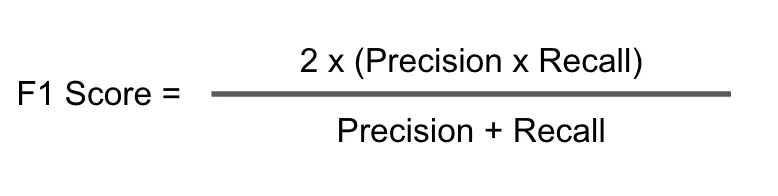

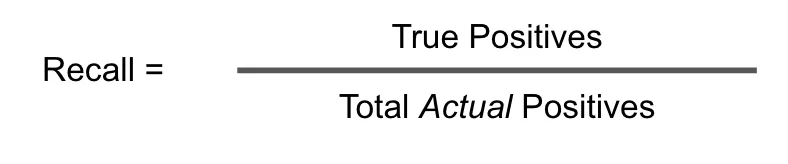

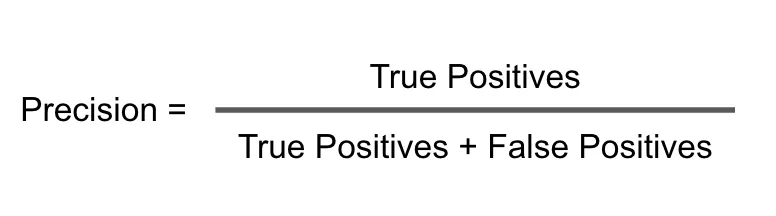

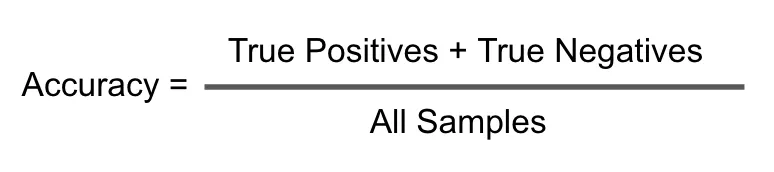

In [190]:
def Calculate_predictions(test_data, train_data,q):
# counters
    true_positive = 0
    false_positive = 0
    false_negative = 0
    total = len(test_data[test_data["Class"] == "M"])
# Add to the counters
    for j, test_row in test_data.iterrows():
        predict_class = nearest_neighbour(train_data,test_row,q)
        true_class = test_row["Class"]
        if predict_class == "M" and true_class == "M":
            true_positive += 1
        elif predict_class == "M" and true_class == "R":
            false_positive += 1
        elif predict_class == "R" and true_class == "M":
            false_negative += 1
# Calculate the metrics
    accuracy = (true_positive + len(test_data[test_data["Class"] ==  "R"]) - false_positive) / len(test_data)
    recall = true_positive / total
    precision = true_positive / (true_positive + false_positive)
    f1 = 2 * (precision * recall) / (precision + recall)
# Display the results
    print("Accuracy ", accuracy)
    print("Recall: ", recall)
    print("Precision: ", precision)
    print("F1 ",f1)
# Calculate predictions using Manhattan distance - Minkowski
print("Manhattan distance")
Calculate_predictions(test_data, train_data, q=1)

# Calculate predictions using Euclidean distance - Minkowski
print("Euclidean distance")
Calculate_predictions(test_data, train_data, q=2)


Manhattan distance
Accuracy  0.8840579710144928
Recall:  0.9459459459459459
Precision:  0.8536585365853658
F1  0.8974358974358975
Euclidean distance
Accuracy  0.8985507246376812
Recall:  0.972972972972973
Precision:  0.8571428571428571
F1  0.9113924050632912


# Conclusion



This task was to implementing the simple Nearest Neighbour algorithm with the Minkowski distance,classify each record from the test dataset based on the training dataset, calculate and display the accuracy, recall, precision, and F1 measure. Overall I'm happy with the functions I made (Minkowski and nearest neighbour) and the metric results produced for both Manhattan and Euclidean these results were very high but Euclidean was the best one overall beating all the metrics of manhattan distance and we can see this above.